In [1]:
%cd C:\Users\tanak\study\参考書\時系列解析

C:\Users\tanak\study\参考書\時系列解析


## 連続状態空間モデル
状態空間モデルは
$$
\boldsymbol{x}_t=\boldsymbol{F}_t(\boldsymbol{x}_{t-1})+\boldsymbol{G}_t(\boldsymbol{v}_t)\\
\boldsymbol{y}_t=\boldsymbol{H}_t(\boldsymbol{x}_t)+\boldsymbol{w}_t
$$
$\boldsymbol{x}_t$: **状態ベクトル**。k次元。観測できないパラメタ。  
$\boldsymbol{v}_t$: **システムノイズ（状態ノイズ）**。m次元。$\boldsymbol{x}_{t-1}$から$\boldsymbol{x}_t$にシフトする過程における撹乱要因。  
　ガウス型モデルの場合は、$\boldsymbol{w}_t$とは独立のホワイトノイズと仮定し、$\boldsymbol{v}_t\sim N(\boldsymbol{0}_m,\boldsymbol{Q}_t)$とする。  
$\boldsymbol{y}_t$: 直接観測可能な**時系列データ**。$l$次元。  
$\boldsymbol{w}_t$: **観測ノイズ**。$l$次元。$\boldsymbol{y}_t$と$\boldsymbol{x}_t$との関係における撹乱要因。  
　ガウス型モデルの場合は、$\boldsymbol{v}_t$とは独立のホワイトノイズと仮定し、$\boldsymbol{w}_t\sim N(\boldsymbol{0}_l,\boldsymbol{R}_t)$とする。  
$\boldsymbol{F}_t$: 非線形関数または線形関数。線形関数の場合は、状態推移行列または係数行列と呼ばれる。  
　k×k行列。$\boldsymbol{x}_{t-1}$から$\boldsymbol{x}_t$にシフトするメカニズムを決める。  
$\boldsymbol{G}_t$: 非線形関数または線形関数。線形関数の場合は係数行列と呼ばれる。k×m行列。  
$\boldsymbol{H}_t$: 非線形関数または線形関数。線形関数の場合は観測行列または係数行列と呼ばれる。$l$×m行列。  
$\boldsymbol{Q}_t$: システムノイズの分散共分散行列。m×m行列。  
$\boldsymbol{R}_t$: 観測ノイズの分散共分散行列。$l$×$l$行列。  
  
2つ目の式は状態$\boldsymbol{x}_t$を回帰係数とする回帰モデルとみなせる。  
このとき1つ目のシステムモデルは、回帰係数の時間的変化を表す。  

#### 状態の逐次推定
状態ベクトル$\boldsymbol{x}_t$を推定する問題は**状態推定**と呼ばれ、観測時点を$j$とし推定する状態の時点を$t$とすると、以下の3つに分類できる。 
- 予測: $j<t$
- フィルタ: $j=t$
- 平滑化: $j>t$  
  
ここで、観測データ$Y_{i:j}=\{\boldsymbol{y}_1,…,\boldsymbol{y}_j\}$が与えられたとき、  
$Y_{i:j}$の下で、状態$x_t$の条件付き確率分布$p(\boldsymbol{x}_t|Y_{i:j})$を求める問題となる。  
  
- 1期先予測
$$
\begin{align}
p(\boldsymbol{x}_t|Y_{i:t-1})&=\int_{-\infty}^{\infty}p(\boldsymbol{x}_t, \boldsymbol{x}_{t-1}|Y_{i:t-1})d\boldsymbol{x}_{t-1}\\
&=\int_{-\infty}^{\infty}p(\boldsymbol{x}_t|\boldsymbol{x}_{t-1},Y_{i:t-1})p(\boldsymbol{x}_{t-1}|Y_{i:t-1})d\boldsymbol{x}_{t-1}\\
&=\int_{-\infty}^{\infty}p(\boldsymbol{x}_t|\boldsymbol{x}_{t-1})p(\boldsymbol{x}_{t-1}|Y_{i:t-1})d\boldsymbol{x}_{t-1}
\end{align}
$$
- フィルタ
$$
\begin{align}
p(\boldsymbol{x}_t|Y_{i:t})&=p(\boldsymbol{x}_t|\boldsymbol{y}_t, Y_{i:t-1})\\
&=\frac{p(\boldsymbol{x}_t,\boldsymbol{y}_t|Y_{i:t-1})}{p(\boldsymbol{y}_t|Y_{i:t-1})}\\
&=\frac{p(\boldsymbol{y}_t|\boldsymbol{x}_t,Y_{i:t-1})p(\boldsymbol{x}_t|Y_{i:t-1})}{p(\boldsymbol{y}_t|Y_{i:t-1})}\\
&=\frac{p(\boldsymbol{y}_t|\boldsymbol{x}_t)p(\boldsymbol{x}_t|Y_{i:t-1})}{p(\boldsymbol{y}_t|Y_{i:t-1})}
\end{align}
$$
  
ここで、$p(\boldsymbol{x}_t|\boldsymbol{x}_{t-1},Y_{i:t-1})=p(\boldsymbol{x}_t|\boldsymbol{x}_{t-1})$に関してはグラフィカルモデルの**有向分離性**を利用している。  
有向分離とは、確率変数の依存関係の独立性を発見するための手法である。$\boldsymbol{x}_t$は$\boldsymbol{x}_{t-1}$にのみ依存しており、$\boldsymbol{y}_t$は$\boldsymbol{x}_t$にのみ依存しており、$Y_{1:t-1}$とは独立である。
- 固定区間平滑化
$$
p(\boldsymbol{x}_t|Y_{i:T})=p(\boldsymbol{x}_t|Y_{i:t})\int_{-\infty}^{\infty}\frac{p(\boldsymbol{x}_{t+1}|Y_{1:T})p(\boldsymbol{x}_{t+1}|\boldsymbol{x}_t)}{p(\boldsymbol{x}_{t+1}|Y_{1:t})}d\boldsymbol{x}_{t+1}
$$
  
以上の式より、逐次的に確率分布を計算することができる。

## 線形ガウスモデル
$$
\boldsymbol{x}_{t}=\boldsymbol{F}_{t}\boldsymbol{x}_{t-1}+\boldsymbol{G}_{t}\boldsymbol{v}_{t},\;\boldsymbol{v}_t\sim N(\boldsymbol{0}_m,\boldsymbol{Q}_t)\\
\boldsymbol{y}_{t}=\boldsymbol{H}_{t}\boldsymbol{x}_{t}+\boldsymbol{w}_{t},\;\boldsymbol{w}_t\sim N(\boldsymbol{0}_l,\boldsymbol{R}_t)
$$
ここで、初期状態は$\boldsymbol{x}_0$である。  
システムノイズ$\boldsymbol{v}_t$、観測ノイ$\boldsymbol{w}_t$、初期状態$\boldsymbol{x}_0$はすべて正規分布に従うと仮定している。  
したがって$p(\boldsymbol{x}|Y_{1:j})$も正規分布となる。  
平均と分散共分散行列だけを求めればよい。  
ここで、状態$\boldsymbol{x_t}$の条件付き分布の平均$\boldsymbol{x_{t|j}}$と分散共分散行列$\boldsymbol{V_{t|j}}$は以下になる。  
$$
\begin{align}
\boldsymbol{x_{t|j}}&=E[\boldsymbol{x_{t}|\boldsymbol{Y_{1:j}}}]\\
\boldsymbol{V_{t|j}}&=E[(\boldsymbol{x_t}-\boldsymbol{x_{t|j}})(\boldsymbol{x_t}-\boldsymbol{x_{t|j}})'|Y_{1:j}]
\end{align}
$$
カルマンフィルタによる1期先予測、フィルタ、平滑化のアルゴリズムを示す。  
- 1期先予測
$$
\begin{align}
\boldsymbol{x_{t|t-1}} &= \boldsymbol{F_{t}}\boldsymbol{x_{t-1|t-1}}\\
\boldsymbol{V_{t|t-1}} &= \boldsymbol{F_{t}}\boldsymbol{V_{t-1|t-1}}\boldsymbol{F'_{t}}+\boldsymbol{G_{t}}\boldsymbol{Q_{t}}\boldsymbol{G'_{t}}
\end{align}
$$
- フィルタ
$$
\begin{align}
\boldsymbol{K_t} &= \boldsymbol{V_{t|t-1}}\boldsymbol{H'_{t}}(\boldsymbol{H_{t}}\boldsymbol{V_{t|t-1}}\boldsymbol{H'_{t}}+\boldsymbol{R_{t}})^{-1}\\
\boldsymbol{x_{t|t}} &= \boldsymbol{x_{t|t-1}}+\boldsymbol{K_{t}}(\boldsymbol{y_{t}}-\boldsymbol{H_{t}}\boldsymbol{x_{t|t-1}})\\
\boldsymbol{V_{t|t}} &= (\boldsymbol{I_{k}}-\boldsymbol{K_{t}}\boldsymbol{H_{t}})\boldsymbol{V_{t|t-1}}
\end{align}
$$
- 固定区間平滑化
$$
\begin{align}
\boldsymbol{A_{t}} &= \boldsymbol{V_{t|t}}\boldsymbol{F'_{t+1}}\boldsymbol{V_{t+1|1}^{-1}}\\
\boldsymbol{x_{t|T}} &= \boldsymbol{x_{t|t-1}} + \boldsymbol{A_{t}}(\boldsymbol{x_{t+1|T}}-\boldsymbol{x_{t+1|t}})\\
\boldsymbol{V_{t|T}} &= \boldsymbol{V_{t|t}}+\boldsymbol{A_{t}}(\boldsymbol{V_{t+1|T}}-\boldsymbol{V_{t+1|t}}\boldsymbol{A'_{t}})
\end{align}
$$

#### トレンドの推定
$$
\begin{align}
y_n&=t_n+w_n \quad w_n \sim N(0,\sigma^2)\\
t_n&=\sum_{i=1}^kc_i^{(k)}t_{n-i}+v_{n1} \quad v_{n1}\sim N(0,\tau^2)
\end{align}
$$
今回、トレンド成分モデルについては2次のトレンドモデル($t_n=2t_{n-1}-t_{n-2}+v_{n1}$)を適用した場合について考える。
$$
\boldsymbol{x}_n=\begin{bmatrix}
t_n\\
t_{n-1}
\end{bmatrix},\quad
\boldsymbol{F}=\begin{bmatrix}
2 & -1\\
1 & 0
\end{bmatrix},\quad
\boldsymbol{G}=\begin{bmatrix}
1\\
0
\end{bmatrix},\quad
\boldsymbol{H'}=\begin{bmatrix}
1\\
0
\end{bmatrix},\quad
$$

<AxesSubplot:xlabel='Month'>

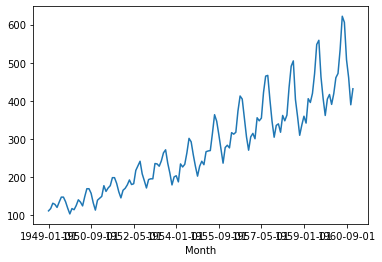

In [2]:
import pandas as pd

df_content = pd.read_csv('air_passenger.csv')
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

n_sim_state(状態の次元数)、F(推移行列)、H(観測行列)、Q(システムノイズの分散共分散行列)を作成する関数を作る。

In [3]:
import numpy as np

def FGHset(n_dim_trend, n_dim_obs=1, n_dim_series=0, Q_sigma2=10):
    n_dim_Q = (n_dim_trend!=0) + (n_dim_series!=0)
    if n_dim_series > 0:
        n_dim_state = n_dim_trend + n_dim_series - 1
    else:
        n_dim_state = n_dim_trend
    
    # 初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
    
    # 各成分のトレンド成分に対するブロック行列
    G[0,0] = 1
    H[0,0] = 1
    
    # トレンドモデルの推移行列
    if n_dim_trend==1:
        F[0,0] = 1
    elif n_dim_trend==2:
        F[0,0] = 2
        F[0,1] = -1
        F[1,0] = 1
    elif n_dim_trend==3:
        F[0,0] = 3
        F[0,1] = -3
        F[0,2] = 1
        F[1,0] = 1
        F[2,1] = 1
    
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q

観測値の次元数、トレンドの次数を定義。

In [4]:
n_dim_obs = 1
n_dim_trend = 2

n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs)

カルマンフィルタを用いたトレンドの推定モデルを定義

In [5]:
from pykalman import KalmanFilter

initial_state_mean = np.zeros(n_dim_state)
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

kf = KalmanFilter(
    n_dim_obs=n_dim_obs, # l: 観測値の次元数
    n_dim_state=n_dim_state, # k: 状態の次元数
    initial_state_mean=initial_state_mean, # x_0: 状態の平均値ベクトルの初期値(k)
    initial_state_covariance=initial_state_covariance, # V_0: 状態の分散共分散行列の初期値(k×k)
    transition_matrices=F, # F: 推移行列(k×k)
    observation_matrices=H, # H: 観測行列(k×k)
    observation_covariance=1.0, # R: 観測ノイズwの分散共分散行列(1×1)
    transition_covariance=Q) # Q: システムのノイズvの分散共分散行列(m×m)

In [6]:
n_train = 120
train, test = y.values[:n_train], y.values[n_train:]

In [7]:
# フィルタ
filtered_state_mean, filtered_state_covs = kf.filter(train)

# フィルタ+平滑化
smoothed_state_mean, smoothed_state_covs = kf.smooth(train)

学習に用いた120時点における推定値は観測行列を用いて以下で計算する。

In [8]:
pred_o_smoothed = smoothed_state_mean.dot(H.T)

カルマンフィルタを用いたトレンド推定モデルの推定結果

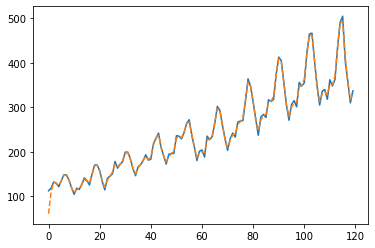

In [9]:
import matplotlib.pyplot as plt

plt.plot(train, label="observation")
plt.plot(pred_o_smoothed, '--', label="predict")

121時点以降について長期予測  
季節性の循環成分があるので、トレンド推定だけではうまく予測できない。

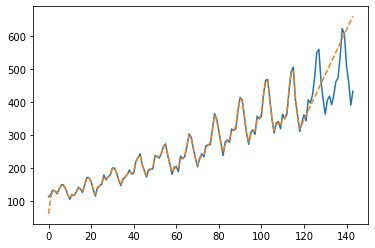

In [10]:
plt.plot(y.values, label="observation")

pred_y = np.empty(len(test))

current_state = smoothed_state_mean[-1]
current_cov = smoothed_state_covs[-1]
for i in range(len(test)):
    current_state, current_covs = kf.filter_update(current_state,
                                                   current_cov,
                                                   observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)
plt.plot(np.hstack([pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

#### 季節調整モデル
加法型季節調整モデルとして以下のシステムを考える。
$$
\begin{align}
y_n&=t_n+s_n+w_n \quad w_n \sim N(0,\sigma^2)\\
t_n&=\sum_{i=1}^kc_i^{(k)}t_{n-i}+v_{n1} \quad v_{n1}\sim N(0,\tau_1^2)\\
s_n&=-\sum_{i=1}^{p-1}s_{n-i}+v_{n2} \quad v_{n2}\sim N(0,\tau_2^2)
\end{align}
$$
トレンド成分モデルに関する係数行列を$\boldsymbol{F}_1$、$\boldsymbol{G}_1$、$\boldsymbol{H}_1$とし、
季節成分モデルに関する係数行列を、$\boldsymbol{F}_2$、$\boldsymbol{G}_2$、$\boldsymbol{H}_2$とする。  
このとき係数行列$\boldsymbol{F}$、$\boldsymbol{G}$、$\boldsymbol{H}$は次式で表される。
$$
\boldsymbol{F}=\begin{bmatrix}
\boldsymbol{F}_1 & \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{F}_2
\end{bmatrix},\quad
\boldsymbol{G}=\begin{bmatrix}
\boldsymbol{G}_1 & \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{G}_2
\end{bmatrix},\quad
\boldsymbol{H'}=\begin{bmatrix}
\boldsymbol{H}_1\\
\boldsymbol{H}_2
\end{bmatrix}
$$
季節成分モデルの係数行列は、
$$
\boldsymbol{F}_2=\begin{bmatrix}
-1&-1&\cdots&\cdots&-1\\
1&0&\cdots&\cdots&\vdots\\
0&1&\ddots&\ddots&\vdots\\
\vdots&\ddots&\ddots&\ddots&\vdots\\
0&\cdots&0&1&0
\end{bmatrix},\quad
\boldsymbol{G}_2=\begin{bmatrix}
1\\
0\\
0\\
\vdots\\
0
\end{bmatrix},\quad
\boldsymbol{H'}_2=\begin{bmatrix}
1\\
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

In [11]:
import numpy as np

def FGHset(n_dim_trend, n_dim_obs=1, n_dim_series=0, Q_sigma2=10):
    n_dim_Q = (n_dim_trend!=0) + (n_dim_series!=0)
    if n_dim_series > 0:
        n_dim_state = n_dim_trend + n_dim_series - 1
    else:
        n_dim_state = n_dim_trend
    
    # 初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
    
    # 各成分のトレンド成分に対するブロック行列
    G[0,0] = 1
    H[0,0] = 1
    
    # トレンドモデルの推移行列
    if n_dim_trend==1:
        F[0,0] = 1
    elif n_dim_trend==2:
        F[0,0] = 2
        F[0,1] = -1
        F[1,0] = 1
    elif n_dim_trend==3:
        F[0,0] = 3
        F[0,1] = -3
        F[0,2] = 1
        F[1,0] = 1
        F[2,1] = 1
    
    start_elem = n_dim_trend
    start_col = n_dim_trend
    
    if n_dim_series>0:
        G[start_elem, 1] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_series-1):
            F[start_elem, start_elem+i] = -1
        for i in range(n_dim_series-2):
            F[start_elem+i+1, start_elem+i] = 1
    
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q

In [12]:
n_dim_obs = 1
n_dim_trend = 2
n_dim_series = 12

n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs, n_dim_series)

In [13]:
from pykalman import KalmanFilter

initial_state_mean = np.zeros(n_dim_state)
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

kf = KalmanFilter(
    n_dim_obs=n_dim_obs, # l: 観測値の次元数
    n_dim_state=n_dim_state, # k: 状態の次元数
    initial_state_mean=initial_state_mean, # x_0: 状態の平均値ベクトルの初期値(k)
    initial_state_covariance=initial_state_covariance, # V_0: 状態の分散共分散行列の初期値(k×k)
    transition_matrices=F, # F: 推移行列(k×k)
    observation_matrices=H, # H: 観測行列(k×k)
    observation_covariance=1.0, # R: 観測ノイズwの分散共分散行列(1×1)
    transition_covariance=Q) # Q: システムのノイズvの分散共分散行列(m×m)

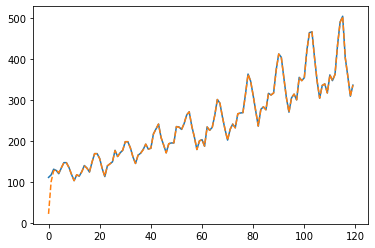

In [14]:
smoothed_state_means, smoothed_state_covs = kf.smooth(train)
pred_o_smoothed = smoothed_state_means.dot(H.T)
plt.plot(train, label="obsevation")
plt.plot(pred_o_smoothed, '--', label="predict")

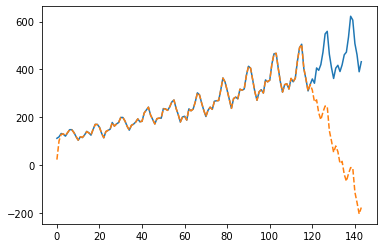

In [15]:
plt.plot(y.values, label="observation")

pred_y = np.empty(len(test))

current_state = smoothed_state_means[-1]
current_cov = smoothed_state_covs[-1]
for i in range(len(test)):
    current_state, current_covs = kf.filter_update(current_state,
                                                   current_cov,
                                                   observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)
plt.plot(np.hstack([pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

モデルインスタンスを作る前に作成したF,H,Qのそれぞれの行列がデータと合っていなかったためである。  
EMアルゴリズムを用いてハイパーパラメータ最適化を行う。

In [16]:
emed_kf = kf.em(train, n_iter=10, em_vars='all')

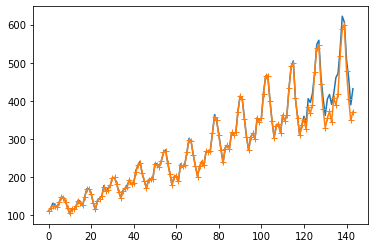

In [17]:
em_smoothed_state_means, em_smoothed_state_covs = emed_kf.smooth(train)

diff = 2 # 階差
# トレンド成分
t_em_pred_o_smoothed = np.dot(em_smoothed_state_means[:, :diff], emed_kf.observation_matrices[:, :diff].T)

# 季節成分
s_em_pred_o_smoothed = np.dot(em_smoothed_state_means[:, diff:], emed_kf.observation_matrices[:, diff:].T)

current_state = em_smoothed_state_means[-1]
current_cov = em_smoothed_state_covs[-1]

t_pred_y = np.empty(len(test))
s_pred_y = np.empty(len(test))

for i in range(len(test)):
    current_state, current_covs = kf.filter_update(current_state,
                                                   current_cov,
                                                   observation=None)
    t_pred_y[i] = emed_kf.observation_matrices[:, :diff].dot(current_state[:diff])
    s_pred_y[i] = emed_kf.observation_matrices[:, diff:].dot(current_state[diff:])

plt.plot(y.values, label="obsevation")
plt.plot(np.hstack([s_em_pred_o_smoothed.flatten()+t_em_pred_o_smoothed.flatten(), s_pred_y+t_pred_y]), '+-', label="forecast")

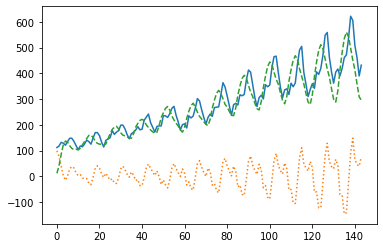

In [18]:
plt.plot(y.values, label="obsevation")
plt.plot(np.hstack([s_em_pred_o_smoothed.flatten(), s_pred_y]), ':', label="seasonal")
plt.plot(np.hstack([t_em_pred_o_smoothed.flatten(), t_pred_y]), '--', label="trend")

### AR成分付き季節調整モデル
季節調整モデルにAR成分を導入する。 
$$
\begin{align}
y_n&=t_n+s_n+r_n+w_n \quad w_n \sim N(0,\sigma^2)\\
t_n&=\sum_{i=1}^kc_i^{(k)}t_{n-i}+v_{n1} \quad v_{n1}\sim N(0,\tau_1^2)\\
s_n&=-\sum_{i=1}^{p-1}s_{n-i}+v_{n2} \quad v_{n2}\sim N(0,\tau_2^2)\\
r_n&=\sum_{i=1}^q\phi_ir_{n-i}+v_{n3} \quad v_{n3}\sim N(0,\tau_3^2)
\end{align}
$$
係数行列$\boldsymbol{F}$、$\boldsymbol{G}$、$\boldsymbol{H}$は次式で表される。
$$
\boldsymbol{F}=\begin{bmatrix}
\boldsymbol{F}_1 & \boldsymbol{0} & \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{F}_2& \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{0} & \boldsymbol{F}_3
\end{bmatrix},\quad
\boldsymbol{G}=\begin{bmatrix}
\boldsymbol{G}_1 & \boldsymbol{0} & \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{G}_2& \boldsymbol{0}\\
\boldsymbol{0} & \boldsymbol{0} & \boldsymbol{G}_3
\end{bmatrix},\quad
\boldsymbol{H'}=\begin{bmatrix}
\boldsymbol{H'}_1\\
\boldsymbol{H'}_2\\
\boldsymbol{H'}_3
\end{bmatrix}
$$
季節成分モデルの係数行列は、
$$
\boldsymbol{F}_3=\begin{bmatrix}
\phi_1&\phi_2&\cdots&\cdots&\phi_q\\
1&0&\cdots&\cdots&\vdots\\
0&1&\ddots&\ddots&\vdots\\
\vdots&\ddots&\ddots&\ddots&\vdots\\
0&\cdots&0&1&0
\end{bmatrix},\quad
\boldsymbol{G}_3=\begin{bmatrix}
1\\
0\\
0\\
\vdots\\
0
\end{bmatrix},\quad
\boldsymbol{H'}_3=\begin{bmatrix}
1\\
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

In [19]:
import numpy as np

def FGHset(n_dim_trend, n_dim_obs=1, n_dim_series=0, n_dim_ar=0, Q_sigma2=10):
    n_dim_Q = (n_dim_trend!=0) + (n_dim_series!=0) +(n_dim_ar!=0)
    if n_dim_series > 0 or n_dim_ar > 0:
        n_dim_state = n_dim_trend + n_dim_series + n_dim_ar - 1
    else:
        n_dim_state = n_dim_trend
    
    # 初期化
    G = np.zeros((n_dim_state, n_dim_Q))
    F = np.zeros((n_dim_state, n_dim_state))
    H = np.zeros((n_dim_obs, n_dim_state))
    Q = np.eye(n_dim_Q) * Q_sigma2
    
    # 各成分のトレンド成分に対するブロック行列
    G[0,0] = 1
    H[0,0] = 1
    
    # トレンドモデルの推移行列
    if n_dim_trend==1:
        F[0,0] = 1
    elif n_dim_trend==2:
        F[0,0] = 2
        F[0,1] = -1
        F[1,0] = 1
    elif n_dim_trend==3:
        F[0,0] = 3
        F[0,1] = -3
        F[0,2] = 1
        F[1,0] = 1
        F[2,1] = 1
    
    start_elem = n_dim_trend
    start_col = n_dim_trend
    
    if n_dim_series>0:
        G[start_elem, 1] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_series-1):
            F[start_elem, start_elem+i] = -1
        for i in range(n_dim_series-2):
            F[start_elem+i+1, start_elem+i] = 1
    
    if n_dim_ar>0:
        G[start_elem, 2] = 1
        H[0, start_elem] = 1
        for i in range(n_dim_ar):
            F[start_elem, start_elem+i] = 0.5
        for i in range(n_dim_ar-1):
            F[start_elem+i+1, start_elem+i] = 1
    
    Q = G.dot(Q).dot(G.T)
    
    return n_dim_state, F, H, Q 

In [20]:
n_dim_obs = 1
n_dim_trend = 2
n_dim_series = 12
n_dim_ar = 2

n_dim_state, F, H, Q = FGHset(n_dim_trend, n_dim_obs, n_dim_series, n_dim_ar)

In [21]:
initial_state_mean = np.zeros(n_dim_state)
initial_state_covariance = np.ones((n_dim_state, n_dim_state))

kf = KalmanFilter(
    n_dim_obs=n_dim_obs, # l: 観測値の次元数
    n_dim_state=n_dim_state, # k: 状態の次元数
    initial_state_mean=initial_state_mean, # x_0: 状態の平均値ベクトルの初期値(k)
    initial_state_covariance=initial_state_covariance, # V_0: 状態の分散共分散行列の初期値(k×k)
    transition_matrices=F, # F: 推移行列(k×k)
    observation_matrices=H, # H: 観測行列(k×k)
    observation_covariance=1.0, # R: 観測ノイズwの分散共分散行列(1×1)
    transition_covariance=Q) # Q: システムのノイズvの分散共分散行列(m×m)

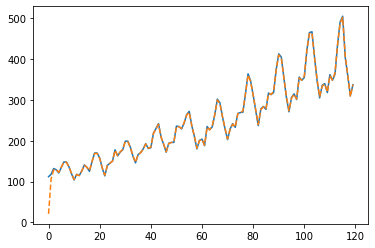

In [29]:
smoothed_state_means, smoothed_state_covs = kf.smooth(train)
pred_o_smoothed = smoothed_state_means.dot(H.T)
plt.plot(train, label="obsevation")
plt.plot(pred_o_smoothed, '--', label="predict")

ハイパーパラメータの最適化

In [28]:
from scipy.optimize import minimize
import copy


# parcorを用いたAR係数の推定
def ar_coef(parcor, n_dim_ar):
    ar_hat = np.zeros(n_dim_ar)
    am = np.zeros(n_dim_ar)
    if n_dim_ar==1:
        ar_hat = parcor
    else:
        for i in range(n_dim_ar):
            ar_hat[i] = parcor[i]
            am[i] = parcor[i]
            if i > 0:
                for j in range(i-1):
                    # m次のj番目の係数の算出
                    # am[j]はm-1次のj番目の係数
                    # am[i-j]はm-j次のm-j番目の係数
                    ar_hat[j] = am[j] - parcor[i] * am[i-j]
                if i < n_dim_ar-1:
                    for j in range(i-1):
                        am[j] = ar_hat[j]
    return ar_hat


# AR係数最適化のための対数尤度の計算
def ar_n_minimize_likelihood(target, kf, train, 
                             idx_target_parcor, st_row, st_col):
    kf.transition_matrices[st_row, st_col+idx_target_parcor] = target
    kf.smooth(train)

    # "masked arrays are not supported"というエラーが発生した場合は
    # https://github.com/pykalman/pykalman/issues/83
    # などを参照してPykalmanのコードを修正してほしい
    return -kf.loglikelihood(train)


# システムノイズの分散共分散行列最適化のための対数尤度の計算
def Q_minimize_likelihood(targets, kf, train, target_idx):
    for i, (r,c) in enumerate(target_idx):
        kf.transition_covariance[r, c] = targets[i]
    kf.smooth(train)
    return -kf.loglikelihood(train)


n_q = 2
# トレンド成分、季節成分、AR成分の分散の最適化の範囲
q_bnds = ((1e-4, 1e3),) * (n_q) + ((1e-4, 5e1),)
# AR成分の最適化の範囲
ar_bnds = ((-0.95, 0.95), )
# 行列GのAR成分成分の位置
st_row = n_dim_trend + n_dim_series - 1
st_col = n_dim_trend + n_dim_series - 1
# 最適化の繰り返し回数
n_iter = 2

# ハイパーパラメタ調整前のモデルを残すために
# オブジェクトをコピーしておく
q_kf = copy.deepcopy(kf)

# AR成分を個別に最適化
for idx_target_parcor in range(n_dim_ar):
    ar_idx_end = st_col + idx_target_parcor
    for i_opt in range(n_iter):
        if idx_target_parcor > 0:
            ar_args = q_kf.transition_matrices[st_row, 
                                               st_col:ar_idx_end]
            ar_cov = [q_kf.transition_covariance[st_row+i, st_col+i] 
                      for i in range(idx_target_parcor)]

        if i_opt==0:
            q_kf = copy.deepcopy(kf)
            
        if idx_target_parcor > 0:
            q_kf.transition_matrices[st_row, st_col:ar_idx_end] = ar_args
            for i in range(idx_target_parcor):
                q_kf.transition_covariance[st_row+i, st_col+i] = ar_cov[i]

        args = (q_kf, train, idx_target_parcor, st_row, st_col)
        # 対象のparcorの係数の最適化
        minimize(ar_n_minimize_likelihood, 
                 (0.,), 
                 args=args, 
                 method='SLSQP', 
                 bounds=ar_bnds)

        q_args = (q_kf, train, [(st_row, st_col)])
        # AR成分の分散共分散行列の要素の最適化
        minimize(Q_minimize_likelihood, 
                 (0., ), 
                 args=q_args, 
                 method='SLSQP', 
                 bounds=(q_bnds[2],))

        q_args = (q_kf, train, [(n_dim_trend, n_dim_trend)])
        # 季節成分の分散共分散行列の要素の最適化
        minimize(Q_minimize_likelihood,
                 (0.,),
                 args=q_args,
                 method='SLSQP',
                 bounds=(q_bnds[1],))

        q_args = (q_kf, train, [(0, 0)])
        # トレンド成分の分散共分散行列の要素の最適化
        minimize(Q_minimize_likelihood,
                 (0.,),
                 args=q_args,
                 method='SLSQP',
                 bounds=(q_bnds[0],))
        
        if idx_target_parcor==0:
            q_kf.transition_matrices[st_row, st_col] = \
                ar_coef(q_kf.transition_matrices[st_row, st_col], 1)
        else:
            q_kf.transition_matrices[st_row, st_col:ar_idx_end+1] = \
                ar_coef(q_kf.transition_matrices[st_row,
                                                 st_col:ar_idx_end+1],
                        idx_target_parcor+1)

In [33]:
optmed_q_kf = copy.deepcopy(q_kf)

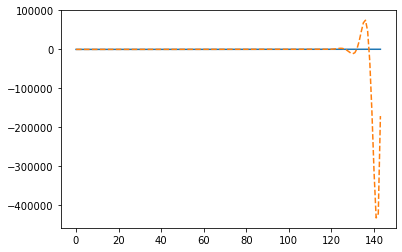

In [34]:
optm_smoothed_state_means, optm_smoothed_state_covs = optmed_q_kf.smooth(train)
optm_pred_o_smoothed = np.dot(optm_smoothed_state_means, 
                              optmed_q_kf.observation_matrices.T)

current_state = optm_smoothed_state_means[-1]
current_cov = optm_smoothed_state_covs[-1]

pred_y = np.empty(len(test))
for i in range(len(test)):
    current_state, current_cov = optmed_q_kf.filter_update(current_state, 
                                                           current_cov, 
                                                           observation=None)
    pred_y[i] = kf.observation_matrices.dot(current_state)

plt.plot(y.values, label="observation")
plt.plot(np.hstack([optm_pred_o_smoothed.flatten(), pred_y]), '--', label="forecast")

#### 信用区間

In [37]:
from scipy.stats import norm

n_train = len(em_smoothed_state_covs)

pred_cov = emed_kf.observation_matrices.dot(np.abs(em_smoothed_state_covs)).transpose(1,0,2).dot(emed_kf.observation_matrices.T)

In [38]:
pred_mean = em_smoothed_state_means.dot(emed_kf.observation_matrices.T)

lower, upper = norm.interval(0.95, pred_mean.flatten(), scale=np.sqrt(pred_cov.flatten()))

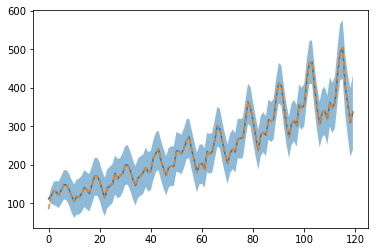

In [42]:
plt.plot(train, label="observation")
plt.plot(optm_pred_o_smoothed, '--', label="forecast")
plt.fill_between(range(len(train)), upper, lower,alpha=0.5, label="credible interval")

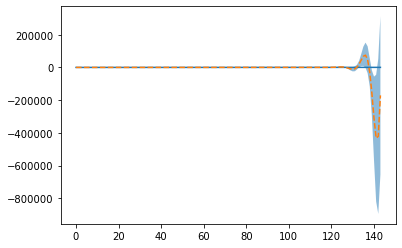

In [43]:
# 階差
diff = n_dim_trend
se = n_dim_trend + n_dim_series -1
# トレンド成分
t_optm_pred_o_smoothed = np.dot(optm_smoothed_state_means[:, :diff], 
                                optmed_q_kf.observation_matrices[:, :diff].T)
# 季節成分
s_optm_pred_o_smoothed = np.dot(optm_smoothed_state_means[:, diff:se], 
                                optmed_q_kf.observation_matrices[:, diff:se].T)
# AR成分
ar_optm_pred_o_smoothed = np.dot(optm_smoothed_state_means[:, se:], 
                                 optmed_q_kf.observation_matrices[:, se:].T)

current_state = optm_smoothed_state_means[-1]
current_cov = optm_smoothed_state_covs[-1]

# 訓練データ数
n_test = len(test)
# 長期予測系列を保存するベクトル
# トレンド成分
t_pred_y = np.empty(n_test)
# 季節成分
s_pred_y = np.empty(n_test)
# AR成分
ar_pred_y = np.empty(len(test))
# 95%信用区間の下限
inf_lower = np.empty(n_test)
# 95%信用区間の上限
inf_upper = np.empty(n_test)
# トレンド成分および季節成分の長期予測
for i in range(len(test)):
    current_state, current_cov = optmed_q_kf.filter_update(current_state, 
                                                           current_cov, 
                                                           observation=None)
    t_pred_y[i] = \
        optmed_q_kf.observation_matrices[:, :diff].dot(current_state[:diff])
    s_pred_y[i] = \
        optmed_q_kf.observation_matrices[:, diff:se].dot(current_state[diff:se])
    ar_pred_y[i] = \
        optmed_q_kf.observation_matrices[:, se:].dot(current_state[se:])

    # y_tの予測分布の分散
    pred_cov = \
        optmed_q_kf.observation_matrices.dot(np.abs(current_cov)) \
                                        .dot(optmed_q_kf.observation_matrices.T)
    # y_tの予測分布の平均
    pred_mean = current_state.dot(optmed_q_kf.observation_matrices.T)
    inf_lower[i], inf_upper[i] = norm.interval(0.95, 
                                               pred_mean, 
                                               scale=np.sqrt(pred_cov))
    
out = s_pred_y + t_pred_y + ar_pred_y

plt.plot(y.values, label="observation")
plt.plot(np.hstack([optm_pred_o_smoothed.flatten(), out]), '--', label="forecast")
all_lower = np.hstack([lower, inf_lower])
all_upper = np.hstack([upper, inf_upper])
plt.fill_between(range(len(y.values)), all_upper, all_lower, alpha=0.5, label="credible interval")

### 粒子フィルタ
非線形非ガウスモデルでは以下のように表現できる。
$$
\boldsymbol{x}_t=F_t(\boldsymbol{x}_{t-1}, \boldsymbol{v}_t)\\
\boldsymbol{y}_t=H_t(\boldsymbol{x}_{t}, \boldsymbol{w}_t)
$$
カルマンフィルタと比較すると、以下のようになる。  

|分布|密度関数|粒子による関数|
|--|--|--|
|予測分布|$$p(\boldsymbol{x}_t|Y_{1:t-1})$$|$$\{\boldsymbol{p}_t^{(1)},\cdots,\boldsymbol{p}_t^{(m)}\}$$|
|フィルタ分布|$$p(\boldsymbol{x}_t|Y_{1:t})$$|$$\{\boldsymbol{f}_t^{(1)},\cdots,\boldsymbol{f}_t^{(m)}\}$$|
|平滑化分布|$$p(\boldsymbol{x}_t|Y_{1:T})$$|$$\{\boldsymbol{s}_t^{(1)},\cdots,\boldsymbol{s}_t^{(m)}\}$$|
|システムノイズの分布|$$p(\boldsymbol{v}_t)$$|$$\{\boldsymbol{v}_t^{(1)},\cdots,\boldsymbol{v}_t^{(m)}\}$$|
  
- 1期先予測  
1期前の状態$\boldsymbol{x}_{t-1}$のフィルタ分布$p(\boldsymbol{x}_{t-1}|Y_{t-1})$に従うm個の粒子$\{\boldsymbol{f}^{(1)}_{t-1},\cdots,\boldsymbol{f}^{(m)}_{t-1}\}$(フィルタ分布からの実現値)と  
m個のシステムノイズの粒子$\{\boldsymbol{v}_t^{(1)},\cdots,\boldsymbol{v}_t^{(m)}\}$が与えられているものとする。  
このとき新しい粒子$\boldsymbol{p}_t$は以下で表される。  
$$
\boldsymbol{p}^{(j)}_t=\boldsymbol{x}_t=F_t(\boldsymbol{f}^{(j)}_{t-1},\boldsymbol{v}^{(j)}_t)
$$
右肩の(j)はm個のうちのj番目の粒子であることを表している。
  
- フィルタ  
観測値$\boldsymbol{y}_t$に基づく粒子$\{\boldsymbol{p}_t^{(1)},\cdots,\boldsymbol{p}_t^{(m)}\}$の尤度$\{\alpha_t^{(1)},\cdots,\alpha_t^{(m)}\}$を計算する。  
この尤度は粒子$\{\boldsymbol{p}_t^{(1)},\cdots,\boldsymbol{p}_t^{(m)}\}$がどのくらい観測値$\boldsymbol{y}_t$にあてはまっているかを表している。  
$$
\alpha^{(j)}_t=p(\boldsymbol{y}_t|\boldsymbol{p}^{(j)}_t)
$$
とする。  
1期先予測分布$\{\boldsymbol{p}_t^{(1)},\cdots,\boldsymbol{p}_t^{(m)}\}$を尤度分布$\{\alpha_t^{(1)},\cdots,\alpha_t^{(m)}\}$に比例した確率でリサンプリングを行うことによりm個の粒子$\{\boldsymbol{f}^{(1)}_{t},\cdots,\boldsymbol{f}^{(m)}_{t}\}$(フィルタ分布からの実現値)を求める。  
j個めの粒子のリサンプリングは以下のよう行う。
$$
\begin{cases}
\boldsymbol{p}_t^{(1)} \quad 確率\alpha^{(1)}_t/(alpha^{(1)}_t+\cdots+alpha^{(m)}_t)\\
\vdots\\
\boldsymbol{p}_t^{(m)} \quad 確率\alpha^{(m)}_t/(alpha^{(1)}_t+\cdots+alpha^{(m)}_t)
\end{cases}
$$


- 固定ラグ平滑化  
フィルタ同様に、$j=1,\cdots,m$について、$\{\boldsymbol{s}_{t-L|t-1}^{(j)},\cdots,\boldsymbol{s}_{t-1|t-1}^{(j)},\boldsymbol{p}_t^{(j)}\}$を重み$\{\alpha_t^{(1)},\cdots,\alpha_t^{(m)}\}$でリサンプリングするとにより、$\{\boldsymbol{s}_{t-L|t-1}^{(j)},\cdots,\boldsymbol{s}_{t-1|t-1}^{(j)},\boldsymbol{s}_{t|t}^{(j)}\}$を生成する。  
ただし、$\boldsymbol{s}_{t|t}^{(j)}=\boldsymbol{f}_{t}^{(j)}$であり、ラグLは固定した値とする。



1. 初期分布を近似するk次元の乱数$\{\boldsymbol{f}_0^{(j)}\}_{i=1}^m(\boldsymbol{f}_0^{(j)} \sim p(\boldsymbol{x_0}))$を生成する。
2. $t=1,\cdots,T$について以下のステップを実行する。  
　a. $j=1,\cdots,m$について  
　- k次元のシステムノイズ$\boldsymbol{v}_t^{(j)}\sim p(\boldsymbol{v}_t^{(j)})$を生成する。  
　- $\boldsymbol{p}_t^{(j)}=F_t(\boldsymbol{f}_{t-1}^{(j)},\boldsymbol{v}_t^{(j)})$を計算する。  
　- 重み$\alpha_t^{(j)}=p(\boldsymbol{y}_t|\boldsymbol{p}_t^{(j)})$を計算する。  
　b. 粒子$\{\boldsymbol{p}_t^{(1)},\cdots,\boldsymbol{p}_t^{(m)}\}$から重み$\{\alpha_t^{(1)},\cdots,\alpha_t^{(m)}\}$に比例する確率でm個のリサンプリングを行い、$\{\boldsymbol{f}^{(1)}_{t},\cdots,\boldsymbol{f}^{(m)}_{t}\}$を生成する。